<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/regression_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['Experience Years']].values
y = df['Salary'].values
model.fit(X, y)
print(f'K: {model.coef_}, bias: {model.intercept_}')

K: [9523.65050742], bias: 25673.01576053028


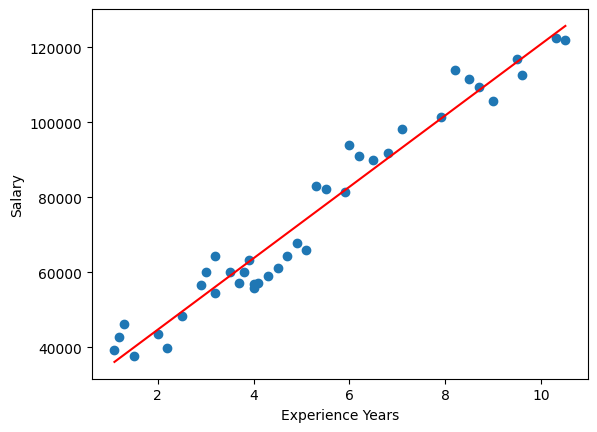

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Experience Years'], df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.plot(df['Experience Years'], model.predict(X), color='red')
plt.show()

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data = data.dropna(subset=['y'])
X = data[['x']].values
y = data['y'].values
model.fit(X, y)
print(f'coef: {model.coef_}, bias: {model.intercept_}')

coef: [0.04618277], bias: 47.400466270549664


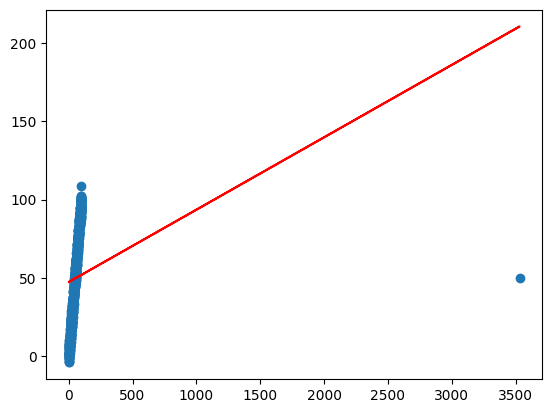

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], model.predict(X), color='red')

In [ ]:
import numpy as np

In [13]:
## lecture 2

In [99]:
import pandas as pd
salary = pd.read_csv('salary.csv')
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [73]:
## types
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [74]:
## missing values
salary.isnull().sum()

,0
rank,0
discipline,0
yrs.since.phd,0
yrs.service,0
sex,0
salary,0


In [75]:
## duplicates sums
salary.duplicated().sum()

np.int64(4)

In [76]:
## drop duplicates
print(salary.shape)
salary.drop_duplicates(inplace=True)
print(salary.shape)

(397, 6)
(393, 6)


In [77]:
## blackbox (mediana q1, q2, q3 ...)

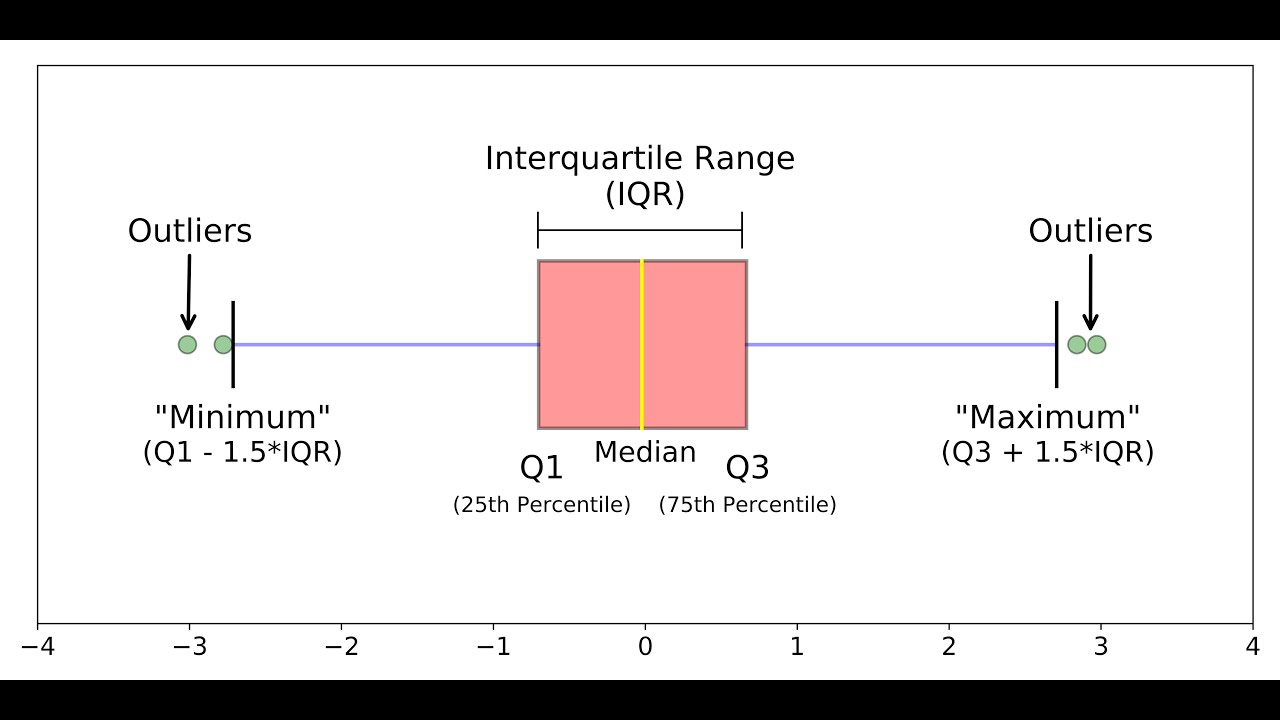

<Axes: >

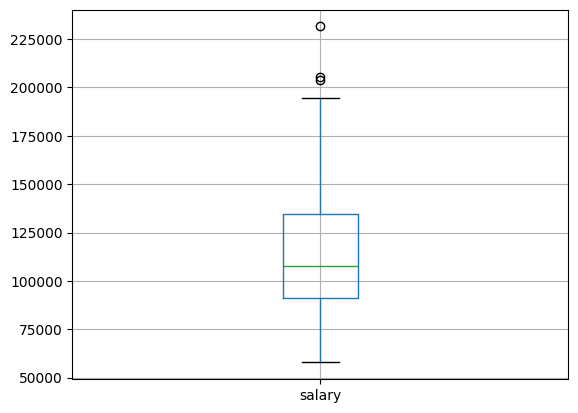

In [78]:
salary.boxplot(column='salary')

In [79]:
## q1, q3
q1 =salary['salary'].quantile(0.25)
q3 =salary['salary'].quantile(0.75)
IQR = q3-q1
lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR
salary = salary[(salary['salary']>lower_bound) & (salary['salary']<upper_bound)]

In [80]:
salary.shape

(390, 6)

In [100]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [101]:
salary['rank'] = salary['rank'].map({'Prof':2, 'AssocProf':1, 'AsstProf':0})
salary['rank'].unique()

array([2, 0, 1])

In [102]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,0,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500


In [103]:
salary['discipline'] = salary['discipline'].map({'B':1, 'A':0})
salary['discipline'].unique()

array([1, 0])

In [104]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,0,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500


<Axes: xlabel='sex'>

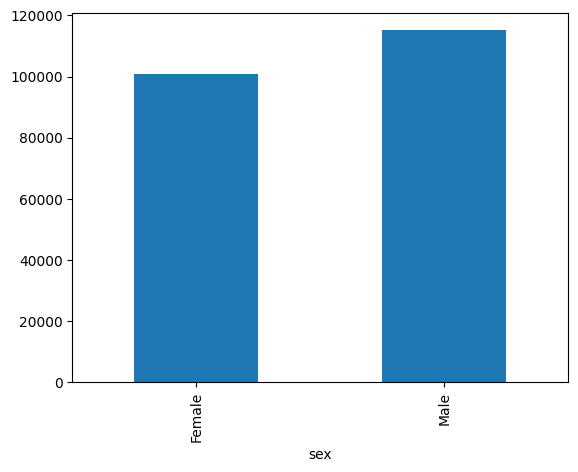

In [105]:
salary.groupby('sex')['salary'].mean().plot(kind='bar')

In [106]:
## aris tu ara damokidebuli sex table da salary -- homework

In [107]:
salary.drop('sex', axis=1, inplace=True)

In [108]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,0,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500


In [109]:
y = salary['salary'].values
X = salary.drop('salary', axis=1).values

In [110]:
# linear model (fit, scatter plot) - homework

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)